In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_json("cloth_yelp.json",lines=True)

In [52]:
df.head()


,item_id,waist,size,quality,cup size,hips,bra size,category,bust,height,user_name,length,fit,user_id,shoe size,shoe width,review_summary,review_text
0,123373,29.0,7,5.0,d,38.0,34.0,new,36,5ft 6in,Emily,just right,small,991571,NaN,NaN,NaN,NaN
1,123373,31.0,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,sydneybraden2001,just right,small,587883,NaN,NaN,NaN,NaN
2,123373,30.0,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,Ugggh,slightly long,small,395665,9.0,NaN,NaN,NaN
3,123373,NaN,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,alexmeyer626,just right,fit,875643,NaN,NaN,NaN,NaN
4,123373,NaN,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,dberrones1,slightly long,small,944840,NaN,NaN,NaN,NaN


In [53]:
df.isnull().sum()

item_id               0
waist             79908
size                  0
quality              68
cup size           6255
hips              26726
bra size           6018
category              0
bust              70936
height             1107
user_name             0
length               35
fit                   0
user_id               0
shoe size         54875
shoe width        64183
review_summary     6725
review_text        6725
dtype: int64

In [54]:
df=df.drop(["item_id","waist","review_summary","review_text","user_id","user_name"],axis=1)

In [55]:
df.head()

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
0,7,5.0,d,38.0,34.0,new,36,5ft 6in,just right,small,NaN,NaN
1,13,3.0,b,30.0,36.0,new,NaN,5ft 2in,just right,small,NaN,NaN
2,7,2.0,b,NaN,32.0,new,NaN,5ft 7in,slightly long,small,9.0,NaN
3,21,5.0,dd/e,NaN,NaN,new,NaN,NaN,just right,fit,NaN,NaN
4,18,5.0,b,NaN,36.0,new,NaN,5ft 2in,slightly long,small,NaN,NaN


In [56]:
df=df.dropna(how="any")

In [57]:
df.shape


(7000, 12)

In [58]:
df.head()

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
23,5,5.0,c,32.0,34.0,new,34,5ft 1in,just right,small,7.0,average
40,18,5.0,ddd/f,44.0,38.0,new,43,5ft 4in,just right,small,8.5,average
49,11,5.0,c,37.0,36.0,new,35,5ft 2in,slightly long,small,6.0,average
65,9,5.0,c,42.0,38.0,new,38,5ft 2in,slightly short,fit,7.0,average
100,20,3.0,c,45.0,40.0,new,38,5ft 7in,just right,fit,10.0,average


In [59]:
type(df["length"])

pandas.core.series.Series

In [60]:
df.dtypes

size            int64
quality       float64
cup size       object
hips          float64
bra size      float64
category       object
bust           object
height         object
length         object
fit            object
shoe size     float64
shoe width     object
dtype: object

In [61]:
df["cup size"].value_counts

<bound method IndexOpsMixin.value_counts of 23           c
40       ddd/f
49           c
65           c
100          c
         ...  
82714     dd/e
82720        c
82751        d
82753     dd/e
82754     dd/e
Name: cup size, Length: 7000, dtype: object>

In [62]:
df["quality"].value_counts()

quality
5.0    2727
4.0    2288
3.0    1502
2.0     388
1.0      95
Name: count, dtype: int64

In [63]:
df["category"].value_counts()

category
new          1775
tops         1754
bottoms      1442
dresses      1410
outerwear     367
sale          242
wedding        10
Name: count, dtype: int64

In [64]:
list=["category","bust","height","length","fit"]
for i in list:
    print(df[i].value_counts())

category
new          1775
tops         1754
bottoms      1442
dresses      1410
outerwear     367
sale          242
wedding        10
Name: count, dtype: int64
bust
36       1241
34       1030
38        595
35        545
37        423
32        400
40        390
39        344
33        283
42        270
44        225
41        187
45        180
43        180
48        146
46        115
47         99
31         77
50         51
30         50
49         30
51         29
54         24
52         23
28         15
53         14
26          6
56          5
29          5
20          5
23          3
55          2
25          2
27          2
24          2
37-39       1
58          1
Name: count, dtype: int64
height
5ft 4in     1001
5ft 6in      964
5ft 5in      831
5ft 3in      796
5ft 7in      725
5ft 2in      704
5ft 8in      506
5ft 1in      373
5ft 9in      334
5ft          234
5ft 10in     232
4ft 11in     111
5ft 11in      86
6ft           51
4ft 10in      29
6ft 1in       12
6ft 5in    

In [65]:
from sklearn.preprocessing import LabelEncoder


In [66]:
def label_encoded(list):
    le=LabelEncoder()
    le.fit(list)
    print("Mapping of classes:")
    for original, encoded in zip(le.classes_, range(len(le.classes_))):
        print(f"{original} -> {encoded}")
    return le.transform(list)
    

In [67]:
list1=["cup size","category","length","fit","shoe width"]
for i in list1:
    df[i]=label_encoded(df[i])
df.head(5)

Mapping of classes:
a -> 0
aa -> 1
b -> 2
c -> 3
d -> 4
dd/e -> 5
ddd/f -> 6
dddd/g -> 7
h -> 8
i -> 9
j -> 10
k -> 11
Mapping of classes:
bottoms -> 0
dresses -> 1
new -> 2
outerwear -> 3
sale -> 4
tops -> 5
wedding -> 6
Mapping of classes:
just right -> 0
slightly long -> 1
slightly short -> 2
very long -> 3
very short -> 4
Mapping of classes:
fit -> 0
large -> 1
small -> 2
Mapping of classes:
average -> 0
narrow -> 1
wide -> 2


,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
23,5,5.0,3,32.0,34.0,2,34,5ft 1in,0,2,7.0,0
40,18,5.0,6,44.0,38.0,2,43,5ft 4in,0,2,8.5,0
49,11,5.0,3,37.0,36.0,2,35,5ft 2in,1,2,6.0,0
65,9,5.0,3,42.0,38.0,2,38,5ft 2in,2,0,7.0,0
100,20,3.0,3,45.0,40.0,2,38,5ft 7in,0,0,10.0,0


In [68]:
df.dtypes

size            int64
quality       float64
cup size        int32
hips          float64
bra size      float64
category        int32
bust           object
height         object
length          int32
fit             int32
shoe size     float64
shoe width      int32
dtype: object

In [69]:
def rep1(x):
    vari=np.nan
    try:
        vari=float(x)
    except:
        vari=np.nan
    return vari
df["bust"]=df["bust"].map(rep1)

In [70]:
df["bust"].isnull().sum()

1

In [71]:
df=df.dropna(how="any")

In [72]:
df.shape

(6999, 12)

In [73]:
import re
height_list=df["height"].to_list()
updated=[]
def extraction(x):
    numbers=[]
    p='[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'
    if re.search(p,x) is not None:
        for catch in re.finditer(p,x):
            numbers.append(int(catch[0]))
    if len(numbers)==2:
        fina=numbers[1]+numbers[0]*12
    elif len(numbers)==1:
        fina=numbers[0]
    else:
        fina=np.nan
    return fina
for height in height_list:
    updated.append(extraction(height))
df["height"]=updated
    

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_13836\2125366662.py:6: SyntaxWarning: invalid escape sequence '\d'
  p='[\d]+[.,\d]+|[\d]*[.][\d]+|[\d]+'


In [74]:
df

,size,quality,cup size,hips,bra size,category,bust,height,length,fit,shoe size,shoe width
23,5,5.0,3,32.0,34.0,2,34.0,61,0,2,7.0,0
40,18,5.0,6,44.0,38.0,2,43.0,64,0,2,8.5,0
49,11,5.0,3,37.0,36.0,2,35.0,62,1,2,6.0,0
65,9,5.0,3,42.0,38.0,2,38.0,62,2,0,7.0,0
100,20,3.0,3,45.0,40.0,2,38.0,67,0,0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
82714,20,4.0,5,48.0,38.0,3,43.0,61,1,1,8.5,2
82720,26,5.0,3,50.0,38.0,3,43.0,6,0,2,10.5,2
82751,8,3.0,4,34.0,34.0,3,36.0,66,0,2,6.5,0
82753,4,3.0,5,35.0,32.0,3,36.0,66,0,0,10.5,2


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [76]:
sns.set_theme(style="whitegrid")


<Axes: ylabel='size'>

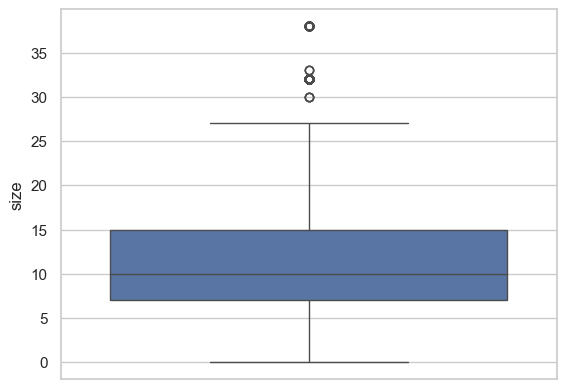

In [77]:
sns.boxplot(df["size"])

In [78]:
df["size"]

23        5
40       18
49       11
65        9
100      20
         ..
82714    20
82720    26
82751     8
82753     4
82754    12
Name: size, Length: 6999, dtype: int64

In [79]:
df=df[df["size"]<28]
df["size"].quantile(0.25)

6.0

In [80]:
df["size"]

23        5
40       18
49       11
65        9
100      20
         ..
82714    20
82720    26
82751     8
82753     4
82754    12
Name: size, Length: 6716, dtype: int64

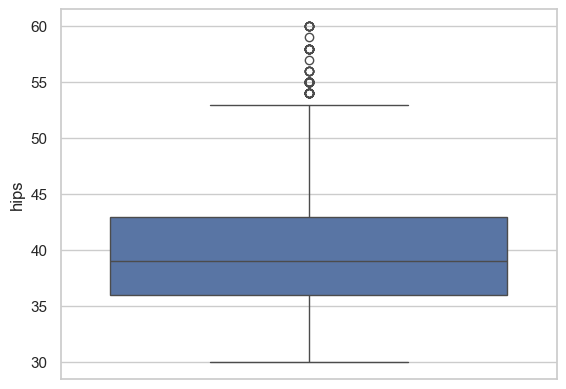

In [81]:
sns.boxplot(df["hips"])
df["hips"].quantile(0.75)*1.5
df=df[df["hips"]<64.5]

<Axes: ylabel='bra size'>

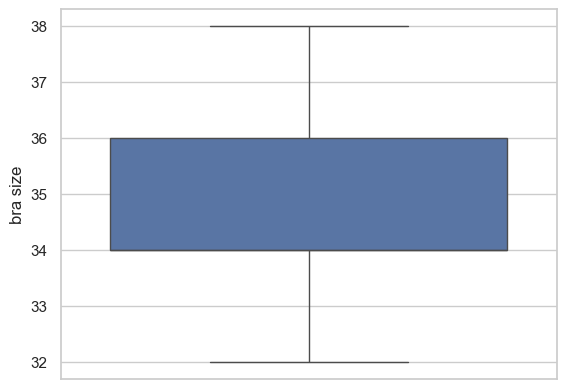

In [82]:

q1=df["bra size"].quantile(0.25)
q3=df["bra size"].quantile(0.75)
iqr=q3-q1

lb=q1-iqr*1.5
up=q3+iqr*1.5

df=df[(df["bra size"]>lb) & (df["bra size"]<up)]
sns.boxplot(df["bra size"])

<Axes: ylabel='height'>

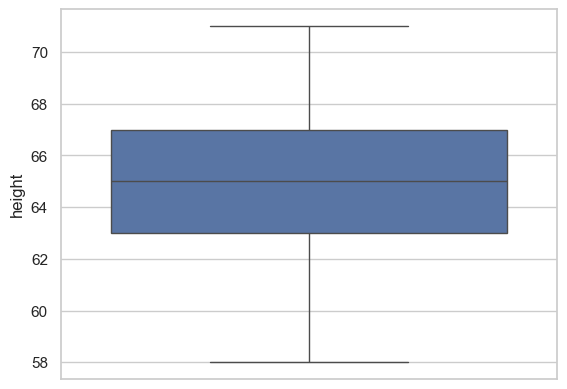

In [83]:
q1=df["height"].quantile(0.25)
q3=df["height"].quantile(0.75)
iqr=q3-q1

lb=q1-iqr*1.5
up=q3+iqr*1.5

df=df[(df["height"]>lb) & (df["height"]<up)]
sns.boxplot(df["height"])

<Axes: ylabel='bust'>

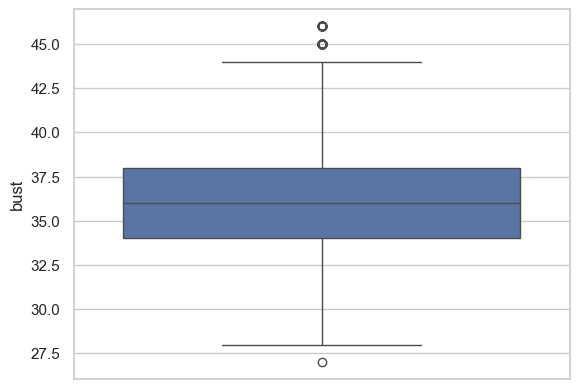

In [84]:
q1=df["bust"].quantile(0.25)
q3=df["bust"].quantile(0.75)
iqr=q3-q1

lb=q1-iqr*1.5
up=q3+iqr*1.5

df=df[(df["bust"]>lb) & (df["bust"]<up)]
sns.boxplot(df["bust"])

<Axes: >

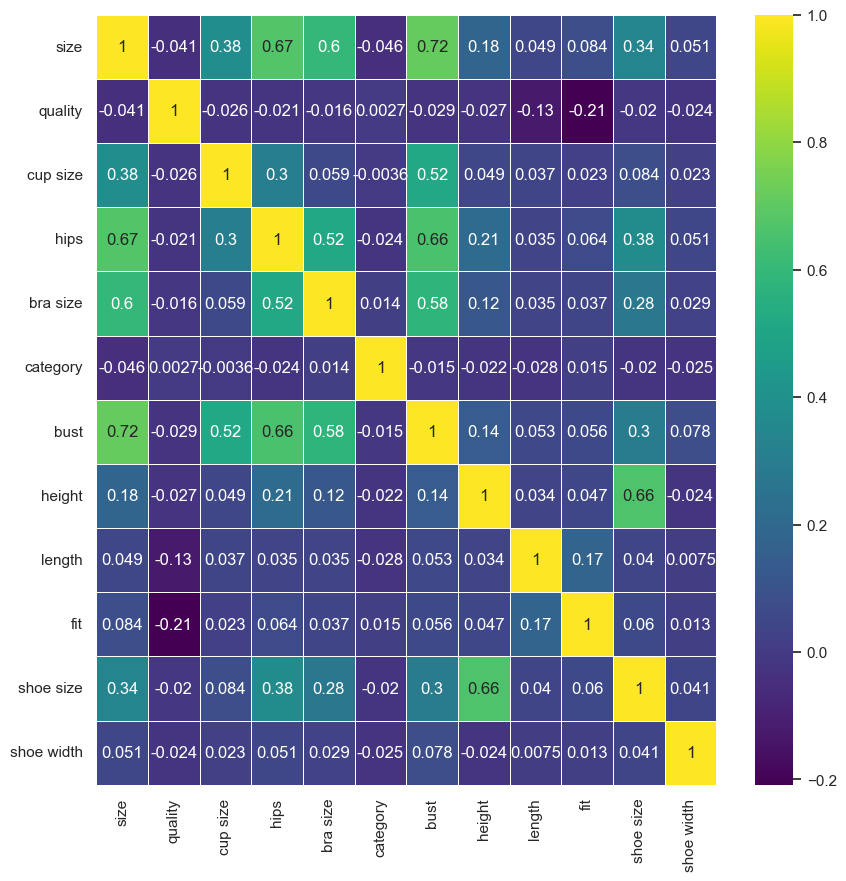

In [85]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="viridis",linewidth=0.5)

In [86]:
y=df["quality"]
x=df.drop(["quality","height","hips","bust"],axis=1)

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [88]:
rmf=RandomForestClassifier(n_estimators=250,n_jobs=-1)

In [89]:
rmf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1)

In [90]:
y_pred=rmf.predict(x_test)

In [91]:
accuracy_score(y_pred,y_test)

0.4007155635062612

In [92]:
import joblib

joblib.dump(rmf, "model.pkl")

['model.pkl']

In [93]:
x.columns

Index(['size', 'cup size', 'bra size', 'category', 'length', 'fit',
       'shoe size', 'shoe width'],
      dtype='object')

In [48]:
x.describe()

,size,cup size,bra size,category,length,fit,shoe size,shoe width
count,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000,5586.000000
mean,9.694057,3.459363,34.717866,2.238811,0.403330,0.450233,7.988901,0.456319
std,5.047033,1.765545,1.938968,1.847519,0.793471,0.734940,1.230601,0.783199
min,0.000000,0.000000,32.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,6.000000,2.000000,34.000000,1.000000,0.000000,0.000000,7.000000,0.000000
50%,8.000000,3.000000,34.000000,2.000000,0.000000,0.000000,8.000000,0.000000
75%,12.000000,5.000000,36.000000,4.000000,1.000000,1.000000,9.000000,1.000000
max,26.000000,11.000000,38.000000,6.000000,4.000000,2.000000,11.500000,2.000000
